In [31]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.default_inference import DefaultInference
import pandas as pd


In [10]:
counts = pd.read_csv('data/count_table_for_deseq_example.csv')

In [11]:
counts.head()

,Geneid,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
0,ENSG00000284662,0,0,0,0,0,0,0,0
1,ENSG00000186827,0,0,1,1,4,0,0,3
2,ENSG00000186891,1,0,0,0,0,2,2,2
3,ENSG00000160072,361,427,416,549,328,174,246,202
4,ENSG00000041988,118,156,124,133,101,56,85,89


In [12]:
# set index gene id
counts = counts.set_index('Geneid')
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000284662,0,0,0,0,0,0,0,0
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...
ENSG00000271254,56,55,54,76,47,67,49,53
ENSG00000275987,0,0,1,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0,0,0


In [14]:
# get red of rows that have 0 counts
counts = counts[counts.sum(axis=1)>1]

In [16]:
# transpose
counts=counts.T

In [26]:

# create metadata (st vs rs)
metadata = pd.DataFrame(zip(counts.index, [i.split('_')[0] for i in counts.index]), columns=['Sample', 'Condition'])
metadata = metadata.set_index('Sample')


In [32]:
# initialize dds object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition",
    refit_cooks=True,
    inference=inference,
)

In [36]:
# count matrix
dds.X

array([[  0,   1, 361, ...,   2,  20,  56],
       [  0,   0, 427, ...,   7,   0,  55],
       [  1,   0, 416, ...,   6,   0,  54],
       ...,
       [  0,   2, 174, ...,   2,  12,  67],
       [  0,   2, 246, ...,   2,   0,  49],
       [  3,   2, 202, ...,   1,   0,  53]])

In [37]:
#run ==> find DE genes
dds.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 11.47 seconds.

Fitting dispersion trend curve...
... done in 2.82 seconds.

Fitting MAP dispersions...
... done in 20.30 seconds.

Fitting LFCs...
... done in 12.74 seconds.

Refitting 0 outliers.



In [42]:
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: Condition RS vs Ctr
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                      
ENSG00000186827    1.107782        2.079048  1.969763  1.055481  0.291205   
ENSG00000186891    1.071147        2.824025  2.029781  1.391296  0.164136   
ENSG00000160072  320.481168       -0.492421  0.163604 -3.009826  0.002614   
ENSG00000041988  103.354977       -0.282301  0.163579 -1.725776  0.084388   
ENSG00000260179    0.758697       -1.673183  2.141571 -0.781287  0.434633   
...                     ...             ...       ...       ...       ...   
ENSG00000273748   27.853823        0.074711  0.449483  0.166216  0.867987   
ENSG00000278817    0.352622        1.081704  2.956626  0.365857  0.714471   
ENSG00000278384    3.791022       -0.257699  0.825881 -0.312030  0.755018   
ENSG00000276345    4.833929       -0.092738  3.191321 -0.029060  0.976817   
ENSG00000271254   

In [44]:
# convert result as df datatype
res = stat_res.results_df
res.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000186827,1.107782,2.079048,1.969763,1.055481,0.291205,NaN
ENSG00000186891,1.071147,2.824025,2.029781,1.391296,0.164136,NaN
ENSG00000160072,320.481168,-0.492421,0.163604,-3.009826,0.002614,0.032540
ENSG00000041988,103.354977,-0.282301,0.163579,-1.725776,0.084388,0.328624
ENSG00000260179,0.758697,-1.673183,2.141571,-0.781287,0.434633,NaN


In [45]:
# convert ENS to gene symbols
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 
res.head()


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000186827,1.107782,2.079048,1.969763,1.055481,0.291205,NaN,TNFRSF4
ENSG00000186891,1.071147,2.824025,2.029781,1.391296,0.164136,NaN,TNFRSF18
ENSG00000160072,320.481168,-0.492421,0.163604,-3.009826,0.002614,0.032540,ATAD3B
ENSG00000041988,103.354977,-0.282301,0.163579,-1.725776,0.084388,0.328624,THAP3
ENSG00000260179,0.758697,-1.673183,2.141571,-0.781287,0.434633,NaN,AL162741.1


In [46]:
# remove genes that are very lowely expressed
res = res[res.baseMean >= 10]

In [48]:
# signifiicant genes
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs.shape


(1137, 7)

## PCA

/home/ouahbi/gexpression_analysis/ge_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


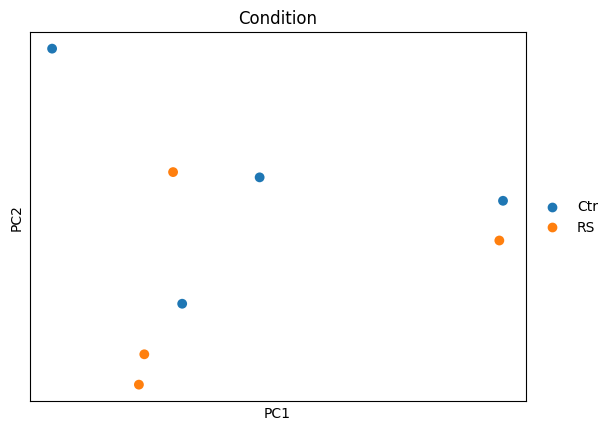

In [50]:
# PCA plots
import scanpy as sc
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'Condition', size = 200)


## GSEA

In [52]:
#GSEA
import gseapy as gp
from gseapy.plot import gseaplot

In [54]:
# ranking oiriginal results
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking = ranking.drop_duplicates('Symbol')
ranking.shape

(13662, 2)

In [56]:
# set of genes of interest
manual_set = {'things':['STAU2', 'USP53', 'SERPINE1', 'TMEM178B', 'PSAP']}

In [57]:
gp.get_library_name() #to look at available libraries

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG

In [58]:
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6, permutation_num = 200)



2023-11-29 07:29:57,626 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [59]:
# make dataframe with term, fdr, erichment score and normalize es
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__DNA-templated tran...,0.0,-0.577271,-2.241721
1,GO_Biological_Process_2021__regulation of bloo...,0.0,0.818502,2.398849
2,GO_Biological_Process_2021__mitotic spindle as...,0.0,-0.685271,-2.407389
3,GO_Biological_Process_2021__mitotic sister chr...,0.0,-0.719770,-2.979830
4,GO_Biological_Process_2021__mitotic spindle ch...,0.0,-0.828825,-2.447769
...,...,...,...,...
2240,GO_Biological_Process_2021__positive regulatio...,1.0,0.155017,0.587661
2241,GO_Biological_Process_2021__regulation of inte...,1.0,0.192904,0.545184
2242,GO_Biological_Process_2021__cAMP-mediated sign...,1.0,0.187422,0.565165
2243,GO_Biological_Process_2021__regulation of ryan...,1.0,0.183910,0.529428


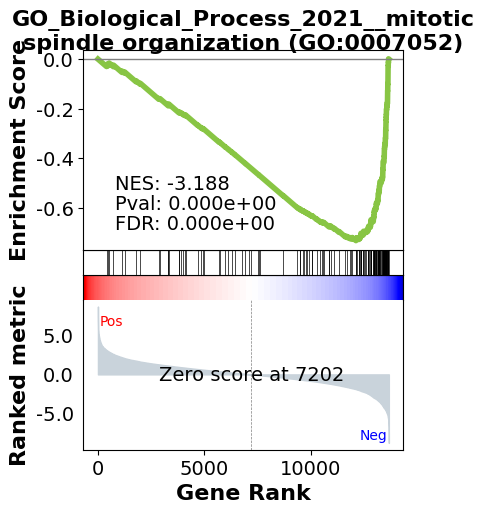

In [64]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1]) # v1.0.5
# to make more control on the plot, use
# from gseapy import gseaplot
gseaplot(rank_metric=pre_res.ranking, term=terms[0], ofname='your.plot.pdf', **pre_res.results[terms[0]])

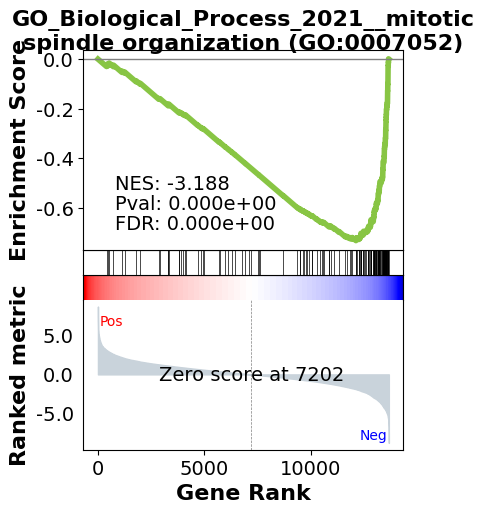

In [63]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1])

## HEATMAP

In [65]:
# make heatmap : need normed counts layer


import numpy as np
import seaborn as sns



In [69]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [70]:
# subset dds object to get only sigs genes
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 1137
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

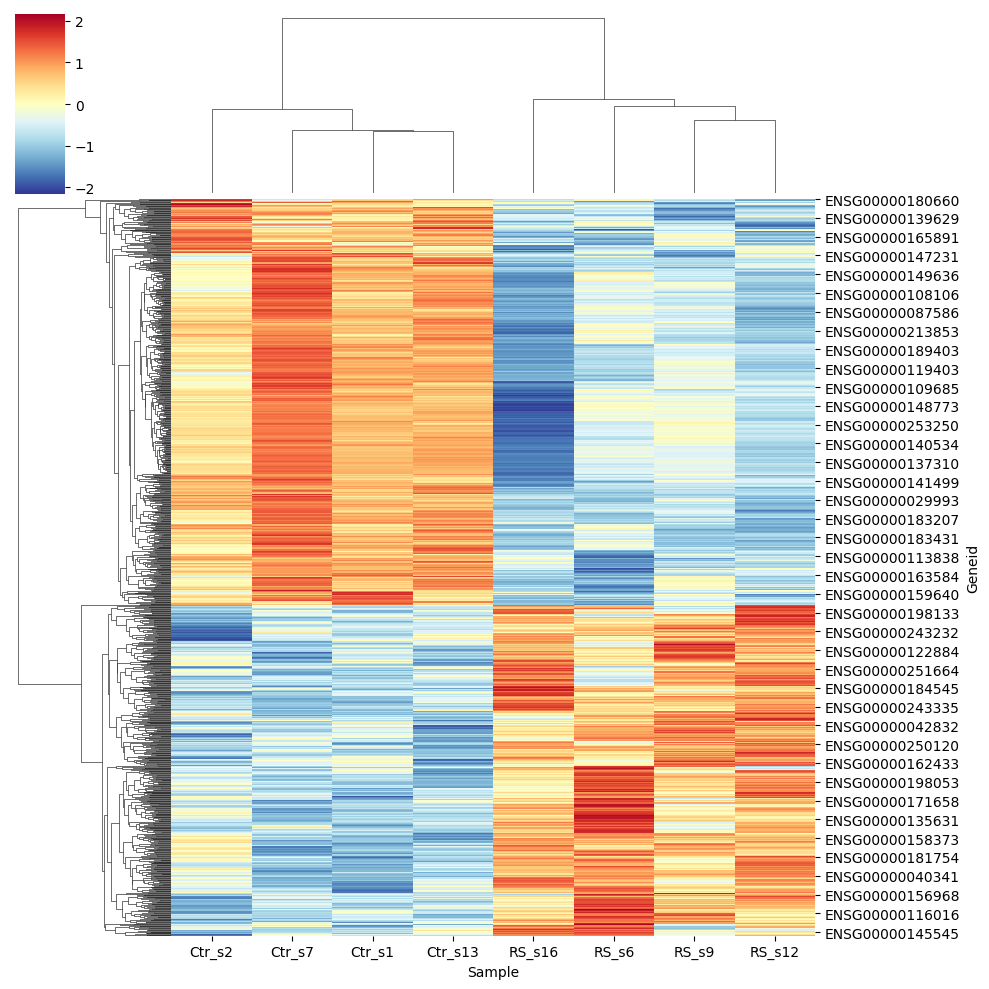

In [72]:
# to do heatmap we need : logp1 values, obs names (samples name) et var names (genes)

grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [74]:
# plot a specific gene symbols
senGPT = [
    "BRCA1", "BRCA2",
    "TP53",
    "EGFR",
    "ALK",
    "HER2",
    "APC",
    "KRAS",
    "FOXP2",
    "HBB",
    "CFTR",
    "APOE",
    "FOXP3",
    "PTEN",
    "NOD2",
    "SOD1"
]



In [78]:
# SUBSET DDS TO GET ONLY BREAST CANCER MARKERS CAMES FROM CHAT GPT
dds_sub = dds[:, res[res.Symbol.isin(senGPT)].index]

In [79]:
dds_sub

View of AnnData object with n_obs × n_vars = 8 × 10
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

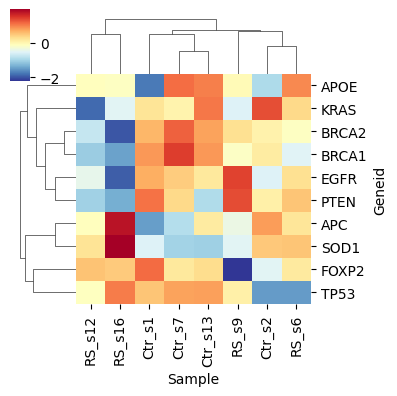

In [82]:
grapher = pd.DataFrame(dds_sub.layers['log1p'].T,
                       index=dds_sub.var_names, columns=dds_sub.obs_names)



grapher.index = grapher.index.map(mapper.mapper)
ax = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', figsize=(4,4))

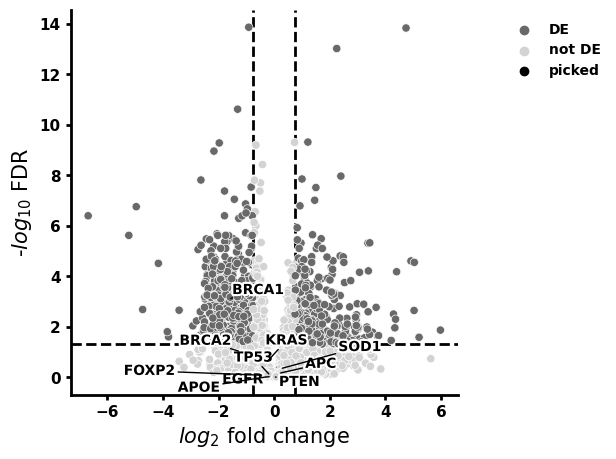

In [83]:
#volcano
from sanbomics.plots import volcano
volcano(res, symbol='Symbol', to_label = grapher.index)
